# Feature Engeneering

In [13]:
RANDOM_SEED = 42

In [14]:
import pickle
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Untitled/projeto1-ml-ames/data


In [16]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'
clean_data_path

PosixPath('/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Untitled/projeto1-ml-ames/data/processed/ames_clean.pkl')

In [17]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [18]:
model_data = data.copy()
model_data.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Sale.Type,Sale.Condition,SalePrice,Condition,HasShed,HasAlley,Exterior,Garage.Age,Remod.Age,House.Age
0,20,RL,141.0,31770.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.332438,Norm,False,False,BrkFace,50.0,50.0,50.0
2,20,RL,81.0,14267.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.235528,Norm,False,False,Wd Sdng,52.0,52.0,52.0
5,60,RL,78.0,9978.0,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,...,GroupedWD,Normal,5.291147,Norm,False,False,VinylSd,12.0,12.0,12.0
15,60,RL,47.0,53504.0,IR2,HLS,CulDSac,Mod,StoneBr,1Fam,...,GroupedWD,Normal,5.730782,Norm,False,False,CemntBd,7.0,7.0,7.0
17,20,RL,88.0,11394.0,Reg,Lvl,Corner,Gtl,StoneBr,1Fam,...,New,Partial,5.595972,Norm,False,False,VinylSd,0.0,0.0,0.0


## Plotando informações

1.7104810148268245e-05 5.13441637961359


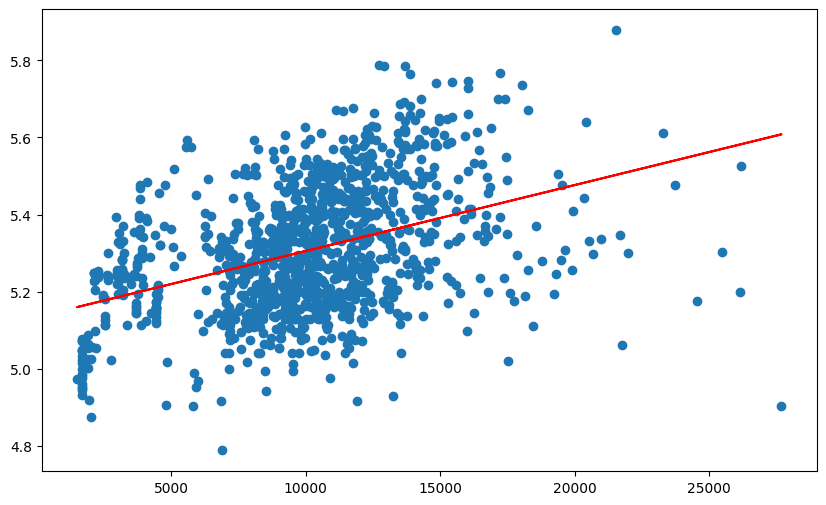

In [24]:
test = data[data['Lot.Area'] <= 30000]
# test = data[data['Lot.Area'] <= 3300000]
# sns.scatterplot(x='Lot.Area', y='SalePrice', data=test)
# sns.regplot(x='Lot.Area', y='SalePrice', data=test, scatter=False)
plt.figure(figsize=(10, 6))
plt.scatter(x='Lot.Area', y='SalePrice', data=test)
m , b = np.polyfit(test['Lot.Area'], test['SalePrice'], 1)
plt.plot(test['Lot.Area'], m*test['Lot.Area'] + b, color='red');

print(m, b)

0.00033637056903743805 5.2239009035600334


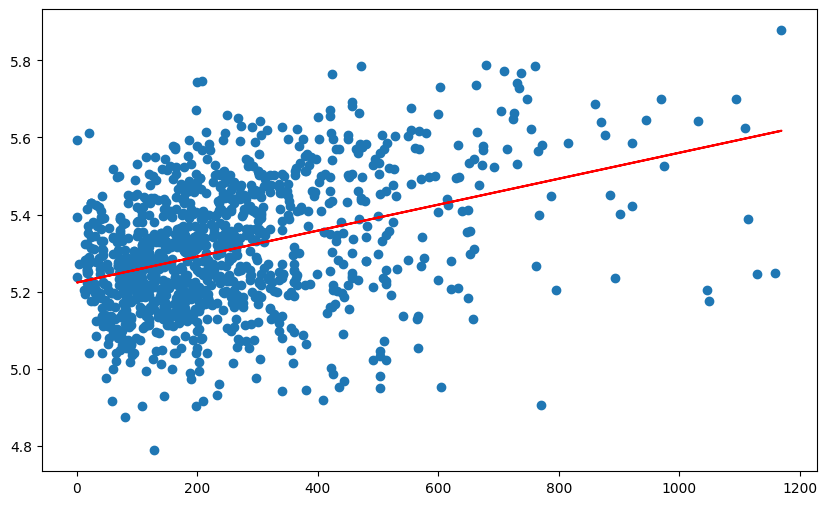

In [25]:
test = data[data['Mas.Vnr.Area'] <= 1200]
# test = data[data['Mas.Vnr.Area'] <= 1000000]
# sns.scatterplot(x='Mas.Vnr.Area', y='SalePrice', data=test)
# sns.regplot(x='Mas.Vnr.Area', y='SalePrice', data=test, scatter=False)
plt.figure(figsize=(10, 6))
plt.scatter(x='Mas.Vnr.Area', y='SalePrice', data=test)
m, b = np.polyfit(test['Mas.Vnr.Area'], test['SalePrice'], 1)
plt.plot(test['Mas.Vnr.Area'], m*test['Mas.Vnr.Area'] + b, color='red');

print (m, b)

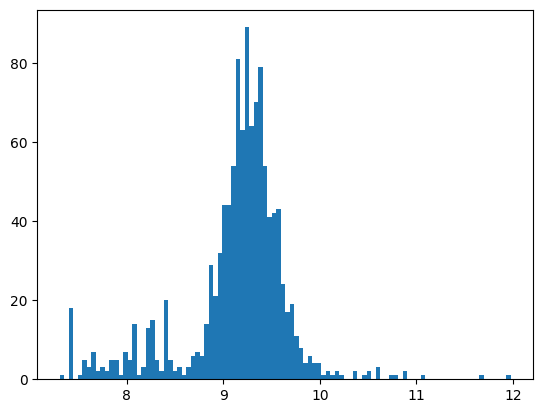

In [28]:
plt.hist(np.log(data['Lot.Area']), bins=100);

In [41]:
data["Mas.Vnr.Area"]

In [48]:
log_mas = np.log(data['Mas.Vnr.Area'])
log_mas.replace([np.inf, -np.inf], np.nan, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


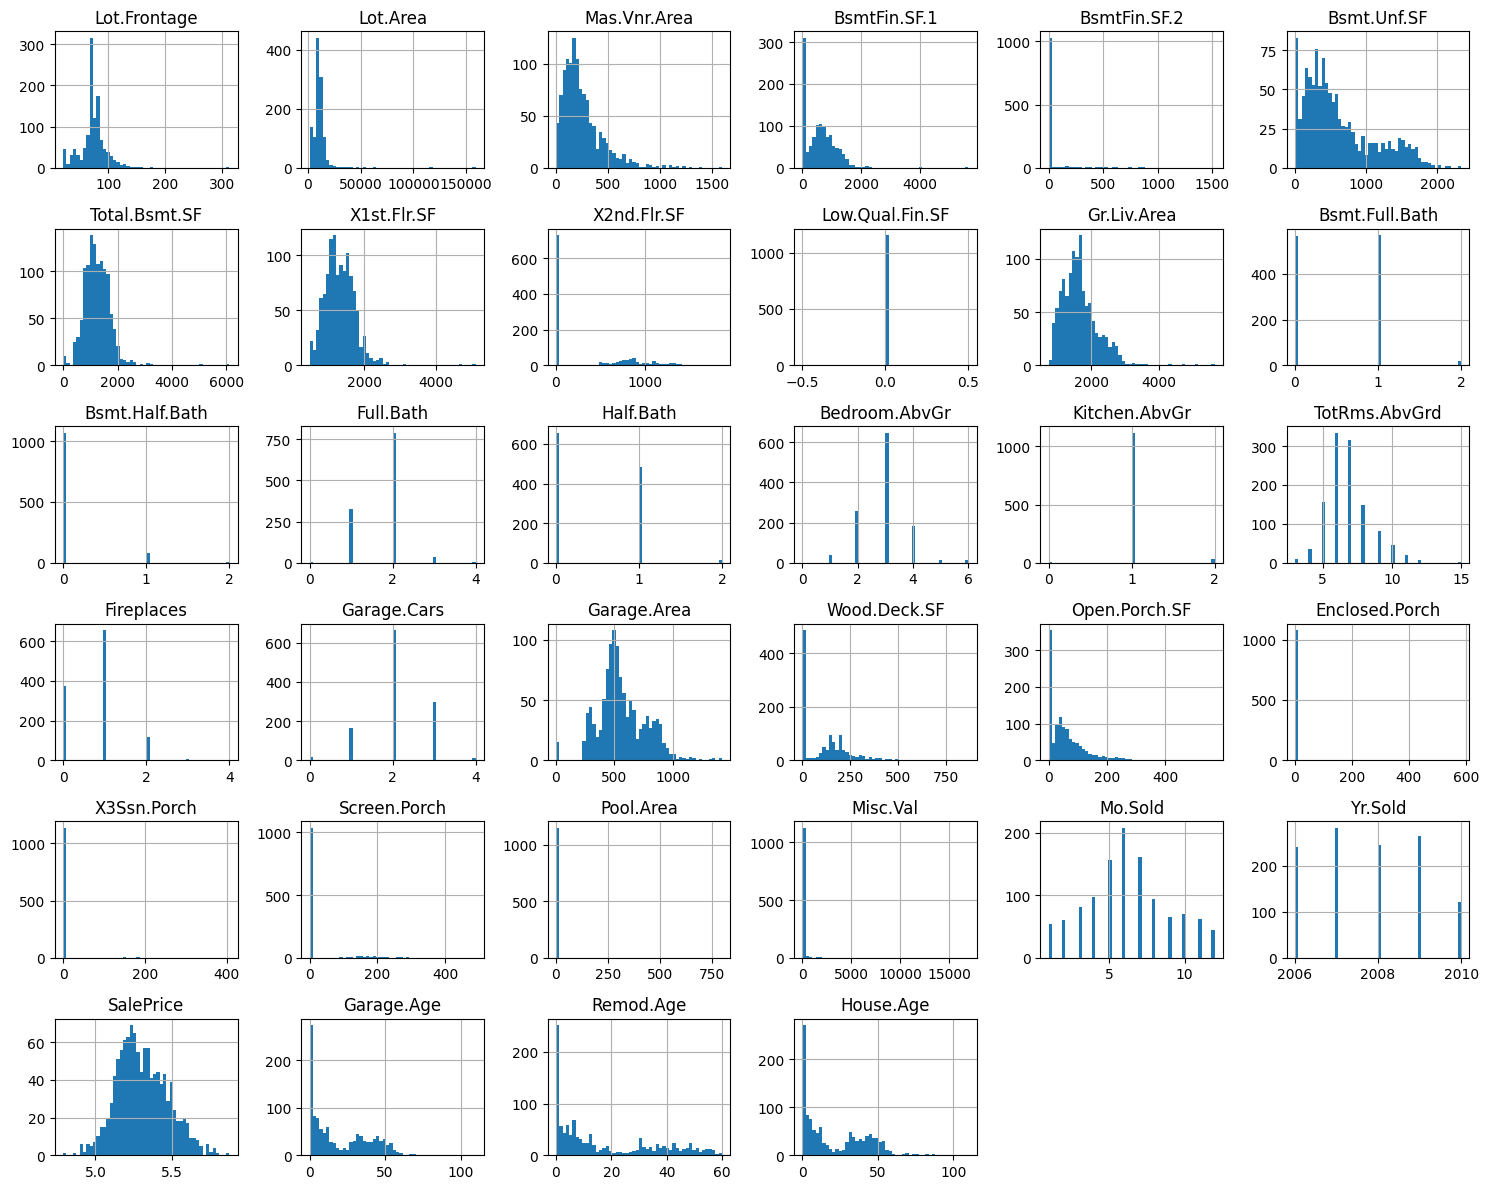

In [62]:
data.hist(figsize=(15,12), bins=50);
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


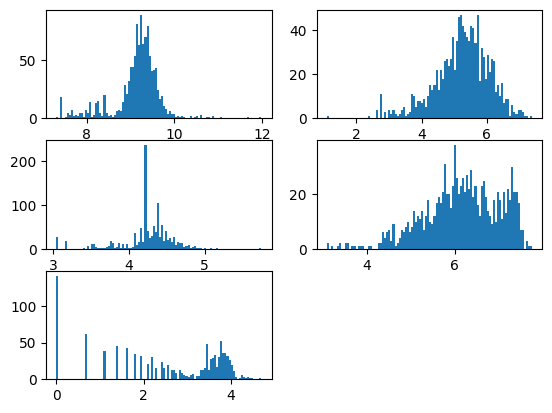

In [67]:
# Transformando para Log e Tratando os Infinitos
log_mas = np.log(data['Mas.Vnr.Area'])
log_mas.replace([np.inf, -np.inf], np.nan, inplace=True)

log_lot = np.log(data['Lot.Area'])
log_lot.replace([np.inf, -np.inf], np.nan, inplace=True)

log_lot_front = np.log(data['Lot.Frontage'])
log_lot_front.replace([np.inf, -np.inf], np.nan, inplace=True)

log_bsmt = np.log(data['Bsmt.Unf.SF'])
log_bsmt.replace([np.inf, -np.inf], np.nan, inplace=True)

log_house_age = np.log(data['House.Age'])
log_house_age.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.subplot(3, 2, 1)
plt.hist(log_lot, bins=100);
plt.subplot(3, 2, 2)
plt.hist(log_mas, bins=100);
plt.subplot(3, 2, 3)
plt.hist(log_lot_front, bins=100);
plt.subplot(3, 2, 4)
plt.hist(log_bsmt, bins=100);